# Exercises week 3 part 3: Basics related to convolutional neural network

IN3310 / IN4310 - Machine Learning for Image Analysis

---

### Task 1: Calculate the theoretical receptive field

You shall implement the function \"receptive_field\" and use it to calculate the theoretical receptive field for each layer of 5 different convolutional neural network architectures:

<img src="images/receptive_field2.png" alt="Drawing" style="width: 600px;"/>

You can apply this equation to compute the receptive field:

$$R^{[k]} = R^{[k-1]} + \bigg[ (F^{[k]} -1)\cdot \prod_{i=1}^{k-1} S^{[i]} \bigg] $$

where:

- Receptive field: 𝑅
- Filter size: 𝐹
- Stride: S
- Layer index: 𝑘
- $R^{[0]}=1$ Receptive field of input data

<b>Note:</b> The superscripted number in brackets specifies the layer index.

You might find this function useful later. The theoretical receptive field should be considered in light of the image size (pixel resolution) and the size of the objects of interest.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [ ]:
def receptive_field(f, s):
    # Computes the theoretical receptive field for each layer of a convolutional neural network.
    
    # Inputs:
    # f (list): Filter size for each layer
    # s (list): Stride for each layer
    
    # Output
    # R: The calculated receptive field for each layer as a numpy array
    
    R = [1]
    for kk in range(len(s)):
        S = 1
        for ii in range(kk):
            S = S * s[ii]
        fov = R[-1] + (f[kk] - 1) * S
        R.append(fov)
    return np.array(R)

In [ ]:
# Compute theoretical receptive field for the architectures.

# Architecture 1
A1_filterSize = [3, 3, 3, 3, 3, 3]
A1_stride     = [1, 1, 1, 1, 1, 1]
A1_Recept     = receptive_field(A1_filterSize, A1_stride)
print(A1_Recept)

# Architecture 2
A2_filterSize = [3, 3, 3, 3, 3, 3]
A2_stride     = [2, 1, 2, 1, 2, 1]
A2_Recept     = receptive_field(A2_filterSize, A2_stride)
print(A2_Recept)

# Architecture 3
A3_filterSize = [3, 3, 3, 3, 3, 3]
A3_stride     = [2, 2, 2, 2, 2, 2]
A3_Recept     = receptive_field(A3_filterSize, A3_stride)
print(A3_Recept)

# Architecture 4
A4_filterSize = [5, 5, 5, 5, 5, 5]
A4_stride     = [1, 1, 1, 1, 1, 1]
A4_Recept     = receptive_field(A4_filterSize, A4_stride)
print(A4_Recept)

# Architecture 5
A5_filterSize = [5, 5, 5, 5, 5, 5]
A5_stride     = [2, 1, 2, 1, 2, 1]
A5_Recept     = receptive_field(A5_filterSize, A5_stride)
print(A5_Recept)

[ 1  3  5  7  9 11 13]
[ 1  3  7 11 19 27 43]
[  1   3   7  15  31  63 127]
[ 1  5  9 13 17 21 25]
[ 1  5 13 21 37 53 85]


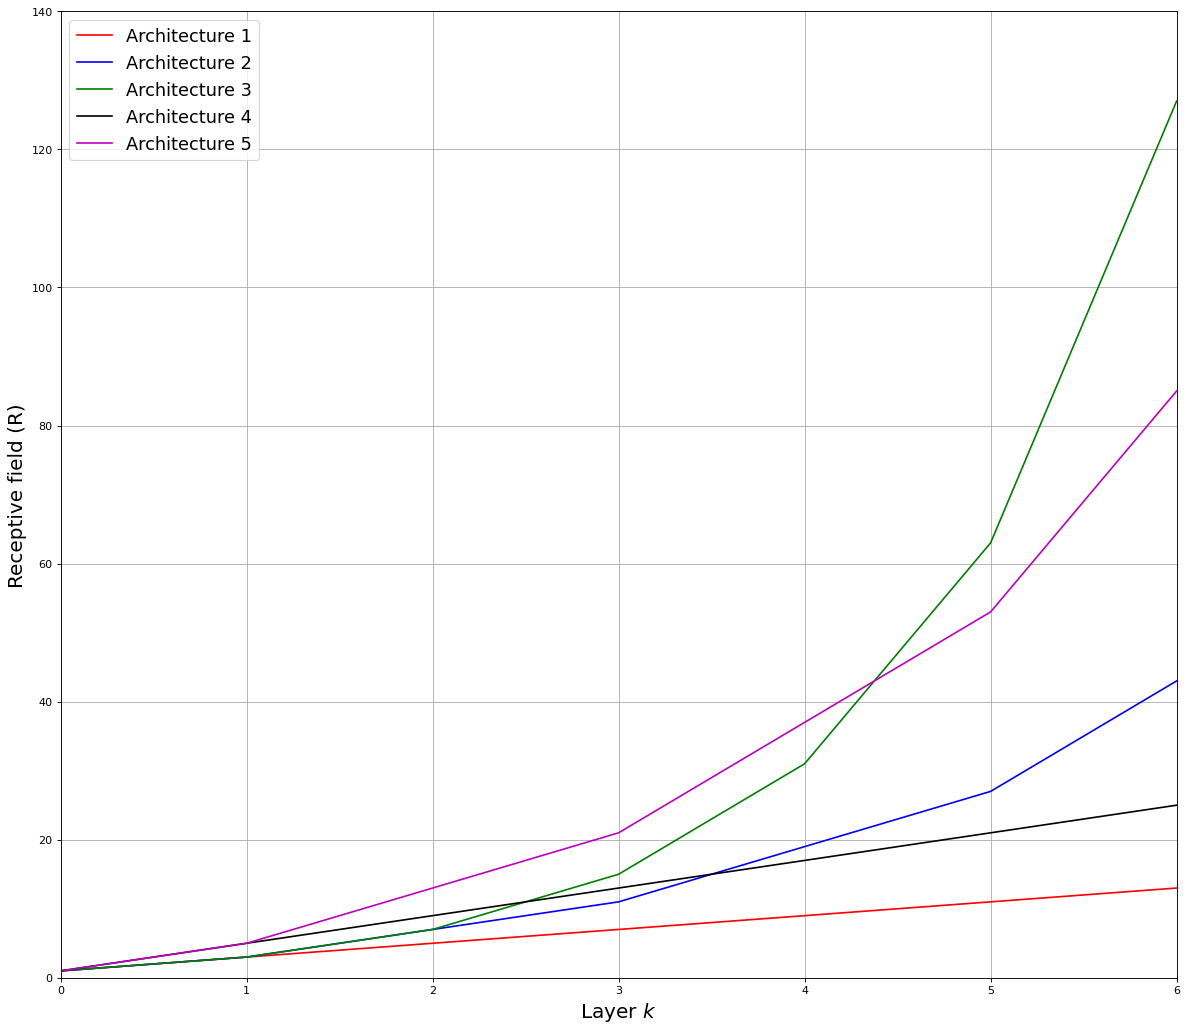

In [ ]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(1, 1, 1)
plt.plot(A1_Recept, 'r', label='Architecture 1')
plt.plot(A2_Recept, 'b', label='Architecture 2')
plt.plot(A3_Recept, 'g', label='Architecture 3')
plt.plot(A4_Recept, 'k', label='Architecture 4')
plt.plot(A5_Recept, 'm', label='Architecture 5')
plt.ylabel('Receptive field (R)', fontsize=18)
plt.xlabel('Layer $k$', fontsize=18)
ax.grid()
plt.ylim([0, 140])
plt.xlim([0, 6])
ax.legend(loc='upper left', fontsize=16)

---

### Task 2: Channel dimension of feature maps

In a vanilla convolutional layer, how does the set of convolution filters affect the number of channels in the resulting feature map?

<b>Solution:</b>

If the convolutional layer applies $F_N^{[i]}$ filters of shape $[𝐹_𝑐^{[i]}, 𝐹_ℎ^{[i]}, 𝐹_𝑤^{[i]}]$, so $w.shape = [F_N^{[i]}, 𝐹_𝑐^{[i]}, 𝐹_ℎ^{[i]}, 𝐹_𝑤^{[i]}]$, and the resulting feature map has shape $a.shape = [N_𝑐^{[i]}, N_ℎ^{[i]}, N_𝑤^{[i]}]$, then $N_c^{[i]} = F_N^{[i]}$.

Note that the convolutional filters each has a number of channels $F_c^{[i]}$ that is equal to the number of channels in the previous feature map, $N_c^{[i-1]}$.

---

### Task 3: Spatial size of the activation map 

Given an activation map with shape $[N_c=128, N_h=225, N_w=225]$ and a kernel with shape $[F_c=128, F_h=5, F_w=5 ]$, what will the spatial size of the next layer's activation map be if we pad with $P=2$ and use stride of $S=2$?

<b>Solution:</b>

$N_h^{[i+1]} = N_w^{[i+1]} = N^{[i+1]} = \frac{N^{[i]}-F+2\cdot P}{S} + 1 = 113$